In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../input/walmart-sales-prediction/train.csv')
features = pd.read_csv('../input/walmart-sales-prediction/features.csv')
stores = pd.read_csv('../input/walmart-sales-prediction/stores.csv')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
features.shape

(8190, 12)

In [6]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
data.shape

(421570, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [10]:
data.corr()['Weekly_Sales']

Store          -0.085195
Dept            0.148032
Weekly_Sales    1.000000
IsHoliday       0.012774
Name: Weekly_Sales, dtype: float64

In [11]:
comb = data.merge(features,'left').merge(stores,'right')

In [12]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [13]:
comb.corr()['Weekly_Sales'].sort_values(ascending = False)

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [14]:
comb.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


(array([2.2824e+05, 1.0044e+05, 3.9914e+04, 2.1844e+04, 1.2686e+04,
        7.5590e+03, 4.3320e+03, 2.3650e+03, 1.4960e+03, 8.1800e+02,
        6.6700e+02, 5.1200e+02, 3.0900e+02, 1.6700e+02, 7.2000e+01,
        4.3000e+01, 2.5000e+01, 1.8000e+01, 7.0000e+00, 1.2000e+01,
        2.0000e+00, 8.0000e+00, 3.0000e+00, 2.0000e+00, 4.0000e+00,
        7.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -4988.94 ,   8972.826,  22934.592,  36896.358,  50858.124,
         64819.89 ,  78781.656,  92743.422, 106705.188, 120666.954,
        134628.72 , 148590.486, 162552.252, 176514.018, 190475.784,
        204437.55 , 218399.316, 232361.082, 246322.848, 260284.614,
        274246.38 , 288208.146, 302169.912, 31

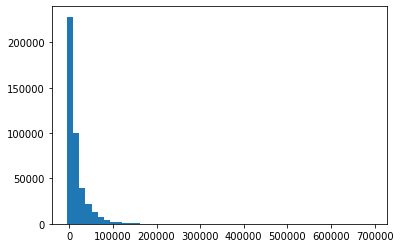

In [15]:
plt.hist(comb['Weekly_Sales'],bins=50)

In [16]:
yr = []
for i in comb['Date']:
  yr.append(int(i.split('-')[0]))

comb['year'] = yr

In [17]:
mn = []
for i in comb['Date']:
  mn.append(int(i.split('-')[1]))

comb['month'] = mn

In [18]:
da = []
for i in comb['Date']:
  da.append(int(i.split('-')[2]))

comb['day'] = da

In [19]:
comb1 = comb.copy()
comb1.drop(columns=['Date'], inplace=True)

In [20]:
comb1.groupby(['month']).sum()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,year,day
month,,,,,,,,,,,,,,,,
1,521937,1039038,3.325984e+08,0,870223.47,76367.351,3.682163e+07,1.112372e+08,9.992948e+05,6.882204e+06,4.326050e+07,4.029965e+06,185014.150,3219984603,47360845,399792
2,786209,1573438,5.687279e+08,8895,1358254.43,111372.346,2.108105e+08,6.519521e+07,7.403472e+05,1.477809e+08,7.233209e+07,6.050472e+06,287621.161,4865006193,71442893,514992
3,852548,1698192,5.927859e+08,0,1894945.71,131072.731,1.271615e+08,7.609068e+06,1.390271e+05,5.579204e+07,4.974710e+07,6.578496e+06,309622.494,5257312710,77328023,590878
4,917150,1823191,6.468598e+08,0,2359336.47,144990.329,6.510115e+07,2.327375e+07,3.043138e+05,1.408803e+07,4.210507e+07,7.056174e+06,331696.064,5653647559,83115844,651821
5,784491,1564694,5.571256e+08,0,2294049.56,126442.259,1.026039e+08,2.051020e+05,1.848232e+06,2.505654e+07,3.885003e+07,6.044468e+06,281903.009,4831206158,71016604,569757
6,847751,1693038,6.226299e+08,0,2850174.48,130593.501,9.365420e+07,2.871815e+06,7.051402e+05,2.352558e+07,7.440216e+07,6.540068e+06,302720.364,5214425748,76696599,548815
7,911769,1818903,6.500010e+08,0,3252072.01,135750.638,5.930780e+07,1.536003e+06,3.145163e+05,3.864670e+07,6.854730e+07,7.009632e+06,325136.892,5601287100,82408017,646531
8,849330,1694546,6.130902e+08,0,3008396.30,130432.408,1.634400e+08,1.135779e+06,5.778445e+05,8.066786e+07,5.505256e+07,6.559005e+06,299025.787,5219754709,76761057,625592
9,851964,1692532,5.787612e+08,8861,2756289.57,131732.167,8.442547e+07,3.224239e+05,4.399078e+05,1.878868e+07,6.038453e+07,6.588184e+06,302755.403,5242060031,77099859,601881


Text(0, 0.5, 'Average sales for a year')

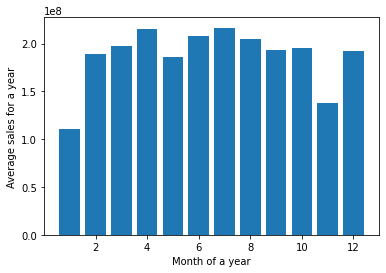

In [21]:
plt.bar(comb1.groupby(['month']).sum().index,comb1.groupby(['month']).sum()['Weekly_Sales']/3)
plt.xlabel('Month of a year')
plt.ylabel('Average sales for a year')

In [22]:
comb1.corr()['Weekly_Sales'].sort_values(ascending = False)

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
month           0.028409
MarkDown2       0.024130
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
day            -0.006187
year           -0.010111
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [24]:
inter = comb.drop(columns = ['Date','IsHoliday','Type'])

In [25]:
imputer.fit(inter)

SimpleImputer(strategy='median')

In [26]:
my = imputer.transform(inter)

In [27]:
data_n = pd.DataFrame(my,columns = inter.columns, index=inter.index)

In [28]:
from sklearn.model_selection import train_test_split
df = data_n.drop(columns = ['Weekly_Sales'])
X_train, X_test, y_train, y_test = train_test_split(df,data_n['Weekly_Sales'],test_size = 0.2)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
y_pred = lr_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

21830.318493673043

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr_reg = DecisionTreeRegressor()
dtr_reg.fit(X_train,y_train)
y_pred = dtr_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

5214.487043944253

In [31]:
def display_scores(model, X_test, y_test):
  scores = cross_val_score(model, X_test, y_test, scoring = 'neg_mean_squared_error',cv = 10)
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Std Deviation: ", scores.std())

In [32]:
from sklearn.model_selection import cross_val_score
display_scores(dtr_reg,X_test,y_test)

Scores:  [-71969309.94958374 -62045833.66162619 -43609890.80372926
 -69508026.70086367 -63739042.71296289 -46563331.86595958
 -70018984.4256651  -42747584.22047012 -62616743.75180639
 -51597076.17342947]
Mean:  -58441582.426609635
Std Deviation:  10734096.518676816


In [33]:
display_scores(lr_reg,X_test,y_test)

Scores:  [-4.63588055e+08 -4.89284890e+08 -4.61411146e+08 -4.98696486e+08
 -5.02943254e+08 -4.55660183e+08 -4.71815631e+08 -4.27817421e+08
 -5.39319761e+08 -4.56773725e+08]
Mean:  -476731055.24100477
Std Deviation:  29851171.173485786


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
y_pred = rf_reg.predict(X_test)
display_scores(rf_reg,X_test,y_test)

Scores:  [-26724250.47247583 -54469751.53989832 -29966075.62046045
 -22376870.58045162 -40314897.06776262 -19930710.25242436
 -28328328.0524522  -22315894.86638704 -43465786.37092596
 -21426485.84875427]
Mean:  -30931905.067199267
Std Deviation:  10878365.050375247


In [35]:
y_pred[5336]

1363.1641

In [36]:
y_test_array = np.array(y_test)

In [37]:
y_test_array[5336]

1930.86

Text(0, 0.5, 'Predicted Weekly Sales')

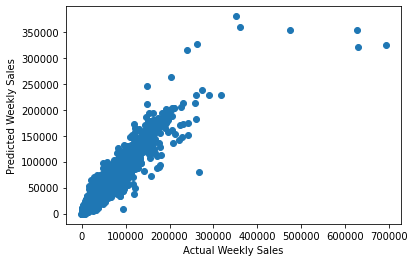

In [38]:
plt.scatter(y_test_array, y_pred)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')